In [1]:
import tensorflow as tf               
import matplotlib.pyplot as plt     
import pandas as pd                 
import numpy as np                 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
import os


In [2]:
temp_2022 = pd.read_csv("./data/temp_2022.csv", encoding="cp949")

In [4]:
#2022 년 데이터
temp_2022.isna().sum()
temp_2022 = temp_2022.fillna(0)

In [5]:
temp_2022

,지점,지점명,일시,기온,풍속,습도,해면기압
0,232,천안,2021-01-21 1:00,-2.1,0.1,74.0,1028.9
1,232,천안,2021-01-21 2:00,-1.6,0.3,72.0,1028.9
2,232,천안,2021-01-21 3:00,-1.0,0.7,70.0,1028.6
3,232,천안,2021-01-21 4:00,-0.7,0.8,70.0,1028.3
4,232,천안,2021-01-21 5:00,-0.9,0.6,74.0,1028.0
...,...,...,...,...,...,...,...
8756,232,천안,2022-01-20 21:00,-3.8,0.1,65.0,1030.5
8757,232,천안,2022-01-20 22:00,-5.4,0.4,72.0,1030.4
8758,232,천안,2022-01-20 23:00,-7.2,0.0,79.0,1030.8
8759,232,천안,2022-01-21 0:00,-7.8,0.0,82.0,1030.7


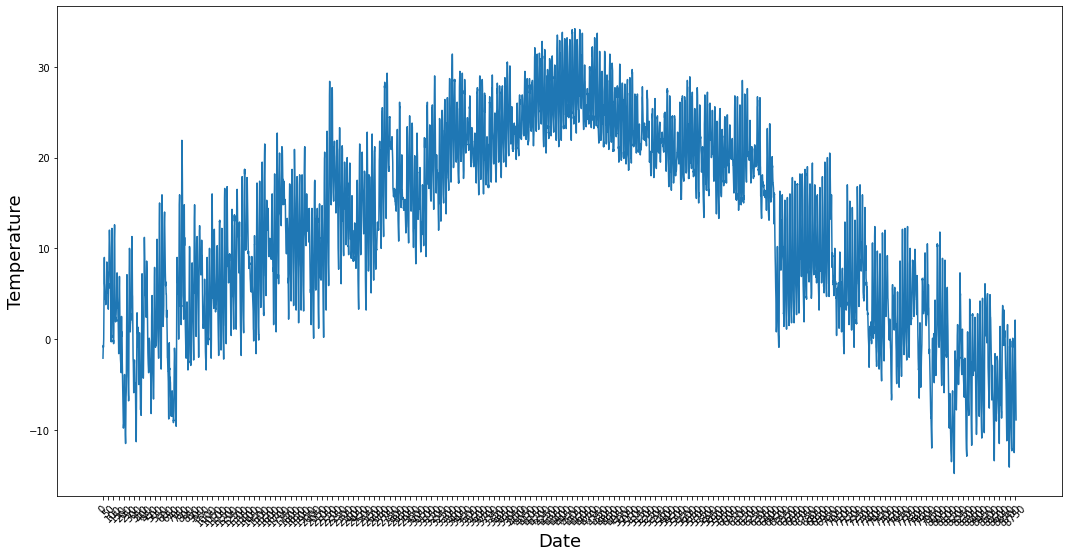

In [8]:
#시각화
plt.figure(figsize = (18,9))
df = temp_2022.copy()
plt.plot(df.index,(df['기온']))
plt.xticks(df.iloc[::50,:].index,rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Temperature',fontsize=18)
plt.show()


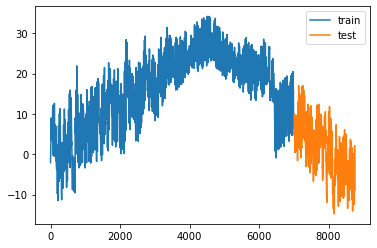

In [9]:
label = temp_2022[['기온']]
split_date = 7008
#학습용 데이터와 테스트용 데이터로 분리
train_data=pd.DataFrame(label.loc[:split_date,['기온']])
test_data=pd.DataFrame(label.loc[split_date:,['기온']])
#분리된 데이터 시각화
ax = train_data.plot()
test_data.plot(ax=ax)
plt.legend(['train', 'test'])

In [10]:
#정규화
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
train_data_sc=scaler.fit_transform(train_data)
test_data_sc= scaler.transform(test_data)

In [11]:
#데이터프레임으로 변경
train_sc_df = pd.DataFrame(train_data_sc, columns=['Scaled'], index=train_data.index)
test_sc_df = pd.DataFrame(test_data_sc, columns=['Scaled'], index=test_data.index)

In [12]:
#과거 데이터 30개(한달)을 사용하여 미래 예측 
for i in range(1, 31):
    train_sc_df ['Scaled_{}'.format(i)]=train_sc_df ['Scaled'].shift(i)
    test_sc_df ['Scaled_{}'.format(i)]=test_sc_df ['Scaled'].shift(i)

In [13]:
#nan 값이 있는 로우를 삭제하고 X값과 Y값을 생성한다.
x_train=train_sc_df.dropna().drop('Scaled', axis=1)
y_train=train_sc_df.dropna()[['Scaled']]

x_test=test_sc_df.dropna().drop('Scaled', axis=1)
y_test=test_sc_df.dropna()[['Scaled']]

In [14]:
x_train.head(10)

,Scaled_1,Scaled_2,Scaled_3,Scaled_4,Scaled_5,Scaled_6,Scaled_7,Scaled_8,Scaled_9,Scaled_10,...,Scaled_21,Scaled_22,Scaled_23,Scaled_24,Scaled_25,Scaled_26,Scaled_27,Scaled_28,Scaled_29,Scaled_30
30,0.339168,0.345733,0.334792,0.345733,0.347921,0.350109,0.352298,0.347921,0.352298,0.354486,...,0.323851,0.286652,0.251641,0.245077,0.234136,0.231947,0.236324,0.229759,0.216630,0.205689
31,0.341357,0.339168,0.345733,0.334792,0.345733,0.347921,0.350109,0.352298,0.347921,0.352298,...,0.389497,0.323851,0.286652,0.251641,0.245077,0.234136,0.231947,0.236324,0.229759,0.216630
32,0.339168,0.341357,0.339168,0.345733,0.334792,0.345733,0.347921,0.350109,0.352298,0.347921,...,0.426696,0.389497,0.323851,0.286652,0.251641,0.245077,0.234136,0.231947,0.236324,0.229759
33,0.354486,0.339168,0.341357,0.339168,0.345733,0.334792,0.345733,0.347921,0.350109,0.352298,...,0.446389,0.426696,0.389497,0.323851,0.286652,0.251641,0.245077,0.234136,0.231947,0.236324
34,0.369803,0.354486,0.339168,0.341357,0.339168,0.345733,0.334792,0.345733,0.347921,0.350109,...,0.448578,0.446389,0.426696,0.389497,0.323851,0.286652,0.251641,0.245077,0.234136,0.231947
35,0.389497,0.369803,0.354486,0.339168,0.341357,0.339168,0.345733,0.334792,0.345733,0.347921,...,0.411379,0.448578,0.446389,0.426696,0.389497,0.323851,0.286652,0.251641,0.245077,0.234136
36,0.407002,0.389497,0.369803,0.354486,0.339168,0.341357,0.339168,0.345733,0.334792,0.345733,...,0.385120,0.411379,0.448578,0.446389,0.426696,0.389497,0.323851,0.286652,0.251641,0.245077
37,0.431072,0.407002,0.389497,0.369803,0.354486,0.339168,0.341357,0.339168,0.345733,0.334792,...,0.382932,0.385120,0.411379,0.448578,0.446389,0.426696,0.389497,0.323851,0.286652,0.251641
38,0.437637,0.431072,0.407002,0.389497,0.369803,0.354486,0.339168,0.341357,0.339168,0.345733,...,0.374179,0.382932,0.385120,0.411379,0.448578,0.446389,0.426696,0.389497,0.323851,0.286652
39,0.431072,0.437637,0.431072,0.407002,0.389497,0.369803,0.354486,0.339168,0.341357,0.339168,...,0.367615,0.374179,0.382932,0.385120,0.411379,0.448578,0.446389,0.426696,0.389497,0.323851


In [15]:
#ndarray로 변환
x_train=x_train.values
x_test=x_test.values

y_train=y_train.values
y_test=y_test.values

In [16]:
#LSTM 모델에 맞게 데이터 셋 변형
x_train_t = x_train.reshape(x_train.shape[0], 30,1)
x_test_t = x_test.reshape(x_test.shape[0], 30, 1)

from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping 

K.clear_session() 
# Sequeatial Model
model = Sequential() 
# 첫번째 LSTM 레이어
model.add(LSTM(30,return_sequences=True, input_shape=(30, 1))) 
# 두번째 LSTM 레이어
model.add(LSTM(42,return_sequences=False))  
# 예측값 1개
model.add(Dense(1, activation='linear')) 
# 손실함수 - MSE
# optimizer - adam
model.compile(loss='mean_squared_error', optimizer='adam') 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 30)            3840      
_________________________________________________________________
lstm_1 (LSTM)                (None, 42)                12264     
_________________________________________________________________
dense (Dense)                (None, 1)                 43        
Total params: 16,147
Trainable params: 16,147
Non-trainable params: 0
_________________________________________________________________


In [21]:
#학습 조기 종료
#vervose - 1
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)

#epochs - 50 
#batch_size - 20
model.fit(x_train_t, y_train, epochs=50,
          batch_size=20, verbose=1, callbacks=[early_stop])

y_pred = model.predict(x_test_t)

Epoch 1/50
349/349 [==============================] - 7s 12ms/step - loss: 0.0129
Epoch 2/50
349/349 [==============================] - 4s 12ms/step - loss: 0.0050
Epoch 3/50
349/349 [==============================] - 4s 12ms/step - loss: 0.0031
Epoch 4/50
349/349 [==============================] - 4s 12ms/step - loss: 0.0019
Epoch 5/50
349/349 [==============================] - 4s 12ms/step - loss: 0.0016
Epoch 6/50
349/349 [==============================] - 4s 12ms/step - loss: 0.0013
Epoch 7/50
349/349 [==============================] - 4s 12ms/step - loss: 0.0014
Epoch 8/50
349/349 [==============================] - 4s 13ms/step - loss: 0.0013
Epoch 9/50
349/349 [==============================] - 4s 13ms/step - loss: 0.0012
Epoch 10/50
349/349 [==============================] - 4s 13ms/step - loss: 0.0012
Epoch 11/50
349/349 [==============================] - 4s 13ms/step - loss: 0.0011
Epoch 12/50
349/349 [==============================] - 4s 12ms/step - loss: 0.0011
Epoch 13/50
3

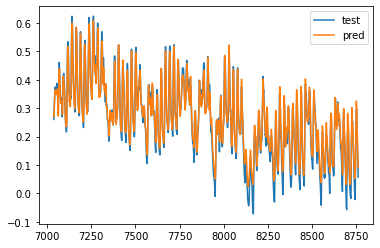

In [22]:
t_df=test_sc_df.dropna()
y_test_df=pd.DataFrame(y_test, columns=['기온'], index=t_df.index)
y_pred_df=pd.DataFrame(y_pred, columns=['기온'], index=t_df.index)

ax1=y_test_df.plot()
y_pred_df.plot(ax=ax1)
plt.legend(['test','pred'])

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)